# Some regularizations on [Abalone](http://archive.ics.uci.edu/ml/datasets/Abalone) dataset
By [Zahra Taheri](https://github.com/zahta), November 4, 2020

### Import libraries

In [1]:
#For some basic operations
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

#For visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

# to make this notebook's output identical at every run
#np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
data=pd.read_csv('abalone.csv')
data.shape

(4177, 9)

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## Descriptive statistics and data visualizations

In [5]:
#Describe the dataset

data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
#Check the no. of unique items in each categorical column

data.select_dtypes('object').nunique()

Sex    3
dtype: int64

In [7]:
# Percentage of missing data in each column

number_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/number_of_columns
print(percentage_of_missing_data)

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
dtype: float64


In [8]:
data['age'] = data['Rings']+1.5
data.drop('Rings', axis = 1, inplace = True)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


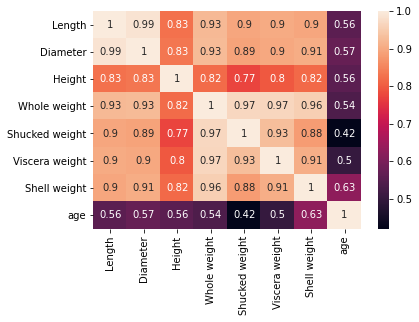

In [9]:
# Correlations

sns.heatmap(data.corr(), annot = True)

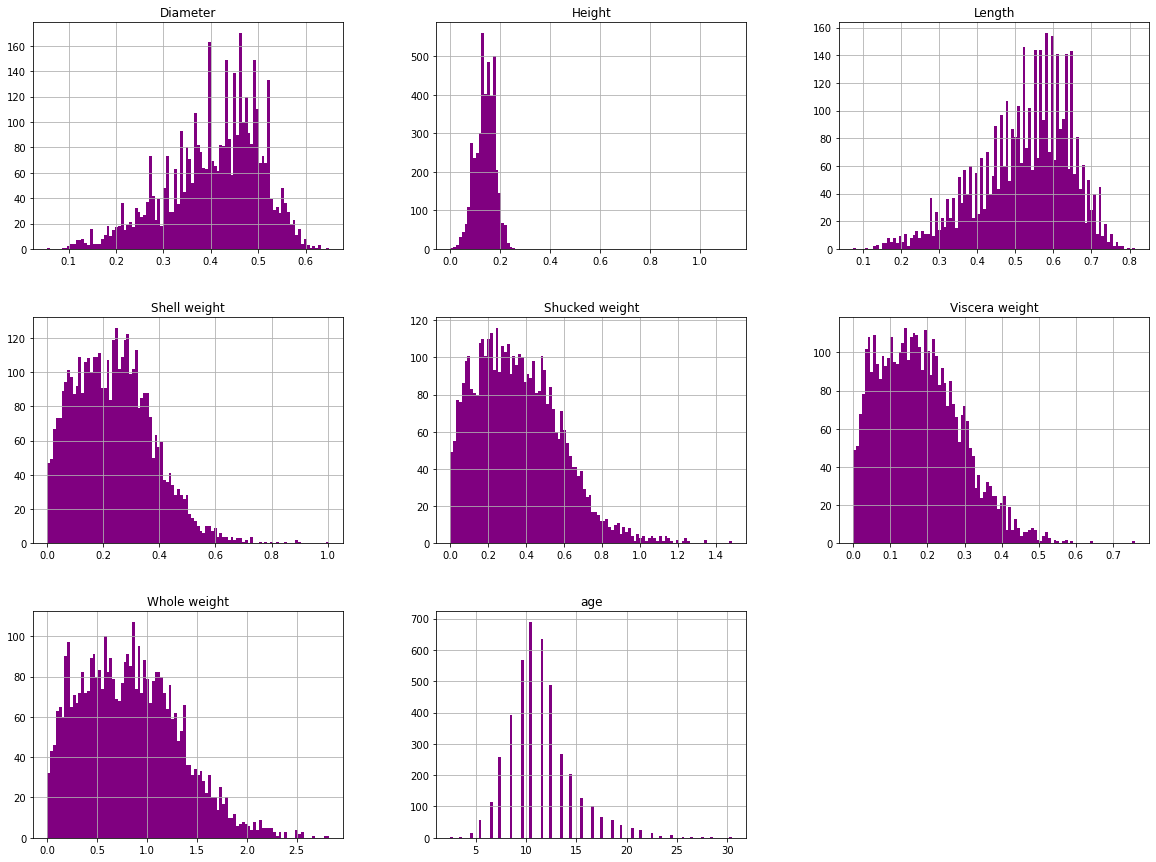

In [10]:
data.hist(bins=100, figsize=(20,15), color='purple')

plt.show()

In [11]:
#Preprocess the categorical input feature, `Sex`:
data_cat = data[["Sex"]]
data_cat.head(10)

,Sex
0,M
1,M
2,F
3,M
4,I
5,I
6,F
7,F
8,M
9,F


In [12]:
data["M"] = np.nan
data["F"] = np.nan
data["I"] = np.nan
columnName='Sex'
for i in range (len(data[columnName])):
    if data[columnName][i]=='M':
        data['M'][i]=1
        data['F'][i]=0
        data['I'][i]=0
    elif data[columnName][i]=='F':
        data['M'][i]=0
        data['F'][i]=1
        data['I'][i]=0
    elif data[columnName][i]=='I' :
        data['M'][i]=0
        data['F'][i]=0
        data['I'][i]=1
data=data.drop(['Sex'],axis=1)

In [13]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,1.0,0.0,0.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,1.0,0.0,0.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,0.0,1.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,1.0,0.0,0.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0.0,0.0,1.0


In [14]:
from sklearn import preprocessing

X=data.drop(['age'],axis=1)
y=data['age']
X = preprocessing.normalize(X)

print(X.shape)
print(y.shape)

(4177, 10)
(4177,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape

(2923, 10)

In [16]:
train_data = X_train
test_data = X_test
train_labels = y_train.values.reshape(-1,1)
test_labels = y_test.values.reshape(-1,1)

## Preparation of the dataset for PyTorch

In [17]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [18]:
from torch.utils.data import TensorDataset, DataLoader

tensor_x = torch.tensor(train_data, dtype=torch.float).to(device) # transform to torch tensor
tensor_x2 = torch.tensor(test_data, dtype=torch.float).to(device) 

In [19]:
tensor_y = torch.tensor(train_labels, dtype=torch.float).to(device)
tensor_y2 = torch.tensor(test_labels, dtype=torch.float).to(device)

In [20]:
train_dataset = TensorDataset(tensor_x, tensor_y) # create your dataset
test_dataset = TensorDataset(tensor_x2,tensor_y2)

## Building Feedforward Neural Networks with PyTorch

In [21]:
# import libraries
from torch.autograd import Variable
from torchsummary import summary

## L2 regularization

### Model A: 3 Hidden Layers Feedforward Neural Network

### Create model class

In [22]:
batch_size = 50
n_iters = 30000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

513


In [23]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False)

In [24]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(FNN, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(hidden_dim3, output_dim)
        #self.relu4 = nn.ReLU()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        out = self.linear4(out)
        #out = self.relu4(out)
        return out

In [25]:
input_dim = tensor_x.shape[1]
output_dim = 1
hidden_dim1 = 100
hidden_dim2 = 2000
hidden_dim3 = 100

In [26]:
model = FNN(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()


In [27]:
summary(model, (1,tensor_x.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 100]           1,100
              ReLU-2               [-1, 1, 100]               0
            Linear-3              [-1, 1, 2000]         202,000
              ReLU-4              [-1, 1, 2000]               0
            Linear-5               [-1, 1, 100]         200,100
              ReLU-6               [-1, 1, 100]               0
            Linear-7                 [-1, 1, 1]             101
Total params: 403,301
Trainable params: 403,301
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 1.54
Estimated Total Size (MB): 1.57
----------------------------------------------------------------


In [28]:
criterion = nn.MSELoss(reduction='sum')

learning_rate = 0.00001
LAMBDA = 0.08
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=LAMBDA)

#### Train the model with L2 regularization

In [29]:
# Train the model

train_loss = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    for i, (X, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            X = Variable(X.cuda())
            labels = Variable(labels.cuda())
        else:
            X = Variable(X)
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(X)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss:
        loss = criterion(outputs, labels)
                
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''

        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Iterate through test dataset
            for X, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    X = Variable(X.cuda())
                else:
                    X = Variable(X)    
                    
                # Forward pass only to get logits/output
                outputs = model(X)
                
                # Calculate Loss:
                loss_t = criterion(outputs, labels)
                
            # Print Loss
            print('Iteration: {}. Training Loss: {}. Test Loss: {}'.format(iter, loss.data, loss_t.data))
            

Iteration: 500. Training Loss: 260.03369140625. Test Loss: 72.69435119628906
Iteration: 1000. Training Loss: 241.53598022460938. Test Loss: 66.18253326416016
Iteration: 1500. Training Loss: 402.8658752441406. Test Loss: 56.3712158203125
Iteration: 2000. Training Loss: 423.76885986328125. Test Loss: 56.3272590637207
Iteration: 2500. Training Loss: 339.4864807128906. Test Loss: 51.958641052246094
Iteration: 3000. Training Loss: 384.6557312011719. Test Loss: 49.07441329956055
Iteration: 3500. Training Loss: 330.3978576660156. Test Loss: 44.049049377441406
Iteration: 4000. Training Loss: 285.7520446777344. Test Loss: 46.82060623168945
Iteration: 4500. Training Loss: 216.02593994140625. Test Loss: 40.438194274902344
Iteration: 5000. Training Loss: 420.19342041015625. Test Loss: 36.636512756347656
Iteration: 5500. Training Loss: 263.13543701171875. Test Loss: 32.156044006347656
Iteration: 6000. Training Loss: 315.45477294921875. Test Loss: 28.14944076538086
Iteration: 6500. Training Loss: 26

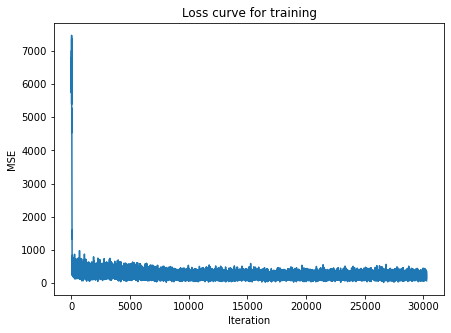

In [30]:
#Plot the loss curve

plt.figure(figsize=(7,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Loss curve for training")
plt.show()


In [31]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'abalone_pytorch_A_l2.pkl')# only save parameters

### Model B: 1 Hidden Layers Feedforward Neural Network

### Create model class

In [32]:
batch_size = 50
n_iters = 30000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

513


In [33]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False)

In [34]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, output_dim):
        super(FNN, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.linear4 = nn.Linear(hidden_dim1, output_dim)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear4(out)
        return out

In [35]:
input_dim = tensor_x.shape[1]
output_dim = 1
hidden_dim1 = 256

In [36]:
model = FNN(input_dim, hidden_dim1, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()


In [37]:
summary(model, (1,tensor_x.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 256]           2,816
              ReLU-2               [-1, 1, 256]               0
            Linear-3                 [-1, 1, 1]             257
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


In [38]:
criterion = nn.MSELoss(reduction='sum')

learning_rate = 0.0001
LAMBDA = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=LAMBDA)

#### Train the model with L2 regularization

In [39]:

# Train the model

train_loss = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    for i, (X, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            X = Variable(X.cuda())
            labels = Variable(labels.cuda())
        else:
            X = Variable(X)
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(X)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss:
        loss = criterion(outputs, labels)
                
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''

        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Iterate through test dataset
            for X, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    X = Variable(X.cuda())
                else:
                    X = Variable(X)    
                    
                # Forward pass only to get logits/output
                outputs = model(X)
                
                # Calculate Loss:
                loss_t = criterion(outputs, labels)
                
            # Print Loss
            print('Iteration: {}. Training Loss: {}. Test Loss: {}'.format(iter, loss.data, loss_t.data))
            

Iteration: 500. Training Loss: 510.60028076171875. Test Loss: 57.33059310913086
Iteration: 1000. Training Loss: 335.172607421875. Test Loss: 49.339866638183594
Iteration: 1500. Training Loss: 347.31396484375. Test Loss: 45.637474060058594
Iteration: 2000. Training Loss: 307.09991455078125. Test Loss: 43.164581298828125
Iteration: 2500. Training Loss: 285.7611083984375. Test Loss: 34.34172821044922
Iteration: 3000. Training Loss: 300.32025146484375. Test Loss: 24.95147705078125
Iteration: 3500. Training Loss: 319.6099853515625. Test Loss: 21.069137573242188
Iteration: 4000. Training Loss: 179.82675170898438. Test Loss: 19.401275634765625
Iteration: 4500. Training Loss: 218.1116485595703. Test Loss: 16.577165603637695
Iteration: 5000. Training Loss: 141.18942260742188. Test Loss: 12.339792251586914
Iteration: 5500. Training Loss: 222.57843017578125. Test Loss: 11.61417293548584
Iteration: 6000. Training Loss: 161.34263610839844. Test Loss: 13.738078117370605
Iteration: 6500. Training Los

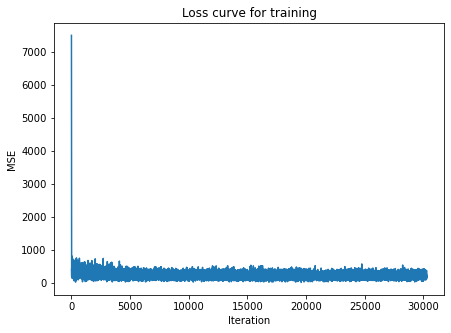

In [40]:
#Plot the loss curve

plt.figure(figsize=(7,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Loss curve for training")
plt.show()


In [41]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'abalone_pytorch_B_l2.pkl')# only save parameters

## L1 regularization

### Model A: 3 Hidden Layers Feedforward Neural Network

### Create model class

In [22]:
batch_size = 50
n_iters = 30000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

513


In [23]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False)

In [24]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(FNN, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(hidden_dim3, output_dim)
        #self.relu4 = nn.ReLU()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        out = self.linear4(out)
        #out = self.relu4(out)
        return out

In [25]:
input_dim = tensor_x.shape[1]
output_dim = 1
hidden_dim1 = 100
hidden_dim2 = 2000
hidden_dim3 = 100

In [26]:
model = FNN(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()


In [27]:
summary(model, (1,tensor_x.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 100]           1,100
              ReLU-2               [-1, 1, 100]               0
            Linear-3              [-1, 1, 2000]         202,000
              ReLU-4              [-1, 1, 2000]               0
            Linear-5               [-1, 1, 100]         200,100
              ReLU-6               [-1, 1, 100]               0
            Linear-7                 [-1, 1, 1]             101
Total params: 403,301
Trainable params: 403,301
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 1.54
Estimated Total Size (MB): 1.57
----------------------------------------------------------------


In [28]:
criterion = nn.MSELoss(reduction='sum')

learning_rate = 0.00001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Train the model with L1 regularization

In [29]:
# Train the model

LAMBDA = 0.001
train_loss = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    for i, (X, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            X = Variable(X.cuda())
            labels = Variable(labels.cuda())
        else:
            X = Variable(X)
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(X)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss:
        loss = criterion(outputs, labels)
        '''
        L1 regularization
        '''
        l1_regularization = torch.tensor(0).long().to(device)
        for param in model.parameters():
            l1_regularization += torch.norm(param, 1).long().to(device)
            
        loss += LAMBDA * l1_regularization
               
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''

        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Iterate through test dataset
            for X, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    X = Variable(X.cuda())
                else:
                    X = Variable(X)    
                    
                # Forward pass only to get logits/output
                outputs = model(X)
                
                # Calculate Loss:
                loss_t = criterion(outputs, labels)
                
            # Print Loss
            print('Iteration: {}. Training Loss: {}. Test Loss: {}'.format(iter, loss.data, loss_t.data))
            

Iteration: 500. Training Loss: 357.2738952636719. Test Loss: 72.23197937011719
Iteration: 1000. Training Loss: 275.524658203125. Test Loss: 70.87078094482422
Iteration: 1500. Training Loss: 342.8293151855469. Test Loss: 60.927791595458984
Iteration: 2000. Training Loss: 258.19439697265625. Test Loss: 59.00916290283203
Iteration: 2500. Training Loss: 186.0392303466797. Test Loss: 53.18733596801758
Iteration: 3000. Training Loss: 355.26336669921875. Test Loss: 53.080894470214844
Iteration: 3500. Training Loss: 226.15162658691406. Test Loss: 49.452720642089844
Iteration: 4000. Training Loss: 280.96820068359375. Test Loss: 45.7349853515625
Iteration: 4500. Training Loss: 500.5721130371094. Test Loss: 45.0621452331543
Iteration: 5000. Training Loss: 162.7928924560547. Test Loss: 41.69554138183594
Iteration: 5500. Training Loss: 272.89739990234375. Test Loss: 39.15443801879883
Iteration: 6000. Training Loss: 202.59536743164062. Test Loss: 36.26460266113281
Iteration: 6500. Training Loss: 387

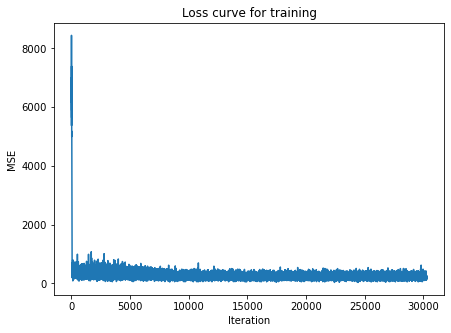

In [30]:
#Plot the loss curve

plt.figure(figsize=(7,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Loss curve for training")
plt.show()


In [31]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'abalone_pytorch_A_l1.pkl')# only save parameters

### Model B: 1 Hidden Layers Feedforward Neural Network

### Create model class

In [32]:
batch_size = 50
n_iters = 30000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

513


In [33]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False)

In [34]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, output_dim):
        super(FNN, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.linear4 = nn.Linear(hidden_dim1, output_dim)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear4(out)
        return out

In [35]:
input_dim = tensor_x.shape[1]
output_dim = 1
hidden_dim1 = 256

In [36]:
model = FNN(input_dim, hidden_dim1, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()


In [37]:
summary(model, (1,tensor_x.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 256]           2,816
              ReLU-2               [-1, 1, 256]               0
            Linear-3                 [-1, 1, 1]             257
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


In [38]:
criterion = nn.MSELoss(reduction='sum')

learning_rate = 0.0001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Train the model with L1 regularization

In [39]:
# Train the model

LAMBDA = 0.001
train_loss = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    for i, (X, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            X = Variable(X.cuda())
            labels = Variable(labels.cuda())
        else:
            X = Variable(X)
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(X)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss:
        loss = criterion(outputs, labels)
        '''
        L1 regularization
        '''
        l1_regularization = torch.tensor(0).long().to(device)
        for param in model.parameters():
            l1_regularization += torch.norm(param, 1).long().to(device)
            
        loss += LAMBDA * l1_regularization
               
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''

        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Iterate through test dataset
            for X, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    X = Variable(X.cuda())
                else:
                    X = Variable(X)    
                    
                # Forward pass only to get logits/output
                outputs = model(X)
                
                # Calculate Loss:
                loss_t = criterion(outputs, labels)
                
            # Print Loss
            print('Iteration: {}. Training Loss: {}. Test Loss: {}'.format(iter, loss.data, loss_t.data))
            

Iteration: 500. Training Loss: 327.45904541015625. Test Loss: 59.05481719970703
Iteration: 1000. Training Loss: 310.3953552246094. Test Loss: 54.62976837158203
Iteration: 1500. Training Loss: 218.66636657714844. Test Loss: 46.05103302001953
Iteration: 2000. Training Loss: 424.985595703125. Test Loss: 40.84159851074219
Iteration: 2500. Training Loss: 247.2696075439453. Test Loss: 30.84187889099121
Iteration: 3000. Training Loss: 248.66455078125. Test Loss: 27.643802642822266
Iteration: 3500. Training Loss: 221.3201141357422. Test Loss: 21.689098358154297
Iteration: 4000. Training Loss: 154.83444213867188. Test Loss: 21.040193557739258
Iteration: 4500. Training Loss: 238.17587280273438. Test Loss: 14.382950782775879
Iteration: 5000. Training Loss: 203.9432830810547. Test Loss: 15.419294357299805
Iteration: 5500. Training Loss: 158.75192260742188. Test Loss: 12.947978973388672
Iteration: 6000. Training Loss: 255.21701049804688. Test Loss: 10.055028915405273
Iteration: 6500. Training Loss:

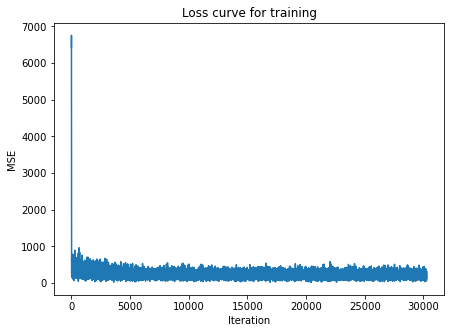

In [40]:
#Plot the loss curve

plt.figure(figsize=(7,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Loss curve for training")
plt.show()


In [41]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'abalone_pytorch_B_l1.pkl')# only save parameters